In [10]:
import sys 

import numpy as np
import pandas as pd
import anndata
from copy import copy
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import scanpy as sc
from scipy.sparse import hstack
import scvelo as scv
from scipy import sparse

sys.path.extend(["../../..", "."])
from paths import DATA_DIR

In [11]:
folder = DATA_DIR / "pancreas" / "rawdata" 

In [12]:
adata = sc.read_h5ad(folder / "adata_pancreas_2019.h5ad")

In [13]:
adata.X = adata.layers["spliced"]

In [14]:
scv.pp.filter_genes(adata, min_shared_counts=20)
scv.pp.normalize_per_cell(adata)
scv.pp.filter_genes_dispersion(adata, n_top_genes=2000)
adata.layers["X_norm"]=sparse.csr_matrix(adata.X.copy())
scv.pp.log1p(adata)
adata.layers["X_log"]=sparse.csr_matrix(adata.X.copy())
    
sc.tl.pca(adata)
sc.pp.neighbors(adata, n_pcs=30, n_neighbors=30)
sc.tl.umap(adata)
scv.pp.moments(adata, n_pcs=None, n_neighbors=None)

Filtered out 6334 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
computing moments based on connectivities
    finished (0:00:03) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


/nfs/staff-ssd/pala/envs/scCFM/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:163: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))


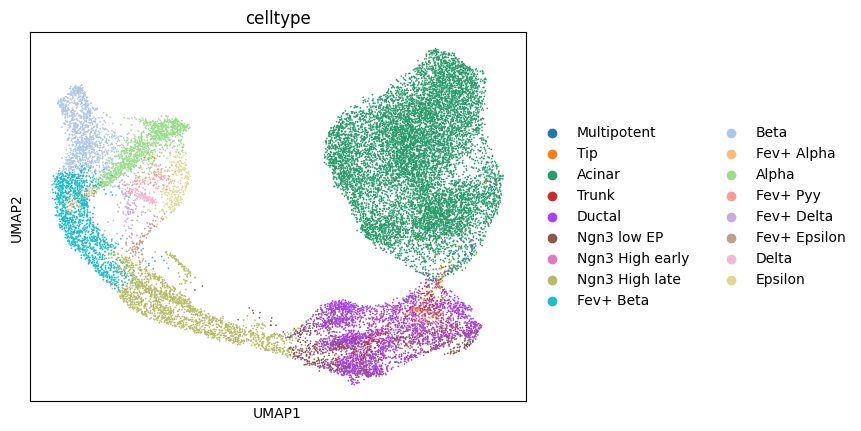

In [15]:
sc.pl.umap(adata, color=["celltype"])

In [16]:
adata.obs["experimental_time"] = np.where(adata.obs.day=="14.5", 0., 1.)

In [25]:
adata.layers["X_log"].max()

8.003304

In [26]:
adata.write_h5ad( DATA_DIR / "pancreas" / "processed" / "pancreas_h5ad" )